# Lesson 1 - Summarizing Data

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

%matplotlib inline

### Make a blank DataFrame

In [2]:
df = pd.DataFrame()

### Populate it with data

In [3]:
df['age'] = [28, 42, 27, 24, 35, 54, 35, 42, 37]

## Measures of Central Tendency

### Mean (using built-in Python functionality)

In [4]:
mean_py = sum(df['age']) / len(df['age'])

In [5]:
mean_py

36.0

### Mean (using NumPy)

In [6]:
mean_np = np.mean(df['age'])

In [7]:
mean_np

36.0

### Median (using built-in Python functionality)

In [8]:
median_py = statistics.median(df['age'])

In [9]:
median_py

35

### Median (using NumPy)

In [10]:
median_np = np.median(df['age'])

In [11]:
median_np

35.0

### Mode (using built-in Python functionality)

In [14]:
mode_py = statistics.mode(df['age'])

StatisticsError: no unique mode; found 2 equally common values

In [15]:
mode_py

NameError: name 'mode_py' is not defined

### Mode (using NumPy)

In [16]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['age'], return_counts=True)

In [17]:
print(values, counts)

[24 27 28 35 37 42 54] [1 1 1 2 1 2 1]


In [18]:
# The location(s) in the values list of the most-frequently-occurring element(s).
ind = [x[0] for x in list(enumerate(counts)) if x[1] == counts[np.argmax(counts)]]

In [19]:
ind

[3, 5]

In [20]:
values

array([24, 27, 28, 35, 37, 42, 54])

In [21]:
# The most frequent element(s).
modes = [values[x] for x in ind]

In [22]:
modes

[35, 42]

## Measures of Variance

### Variance (using NumPy)

In [35]:
df['age']

0    28
1    42
2    27
3    24
4    35
5    54
6    35
7    42
8    37
Name: age, dtype: int64

In [50]:
# change delta degrees of freedom (ddof) to 1 from its default value of 0
var_np = np.var(df['age'], ddof=1)

In [51]:
var_np

86.0

### Variance (using Pandas)

In [52]:
var_pd = df['age'].var()

In [53]:
var_pd

86.0

### Standard Deviation (using NumPy)

In [54]:
std_np = np.std(df['age'], ddof=1)

In [55]:
std_np

9.273618495495704

### Standard Deviation (using Pandas)

In [56]:
std_pd = df['age'].std()

In [57]:
std_pd

9.273618495495704

### Standard Error (using NumPy)

In [60]:
se_np = std_np / np.sqrt(len(df['age']))

In [62]:
se_np

3.0912061651652345

### Standard Error Examples

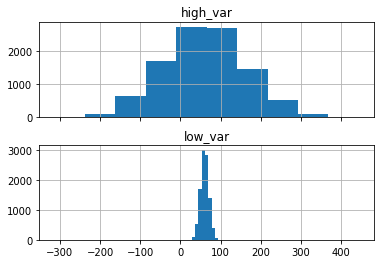


Max of low_var and high_var:
 low_var     101.667642
high_var    443.653164
dtype: float64

Min of low_var and high_var:
 low_var      19.924519
high_var   -313.111447
dtype: float64


In [75]:
# First, create an empty dataframe to store your variables-to-be.
pop = pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var'] = np.random.normal(60, 10, 10000)
pop['high_var'] = np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables.
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print("\nMax of low_var and high_var:\n", pop.max())
print("\nMin of low_var and high_var:\n", pop.min())

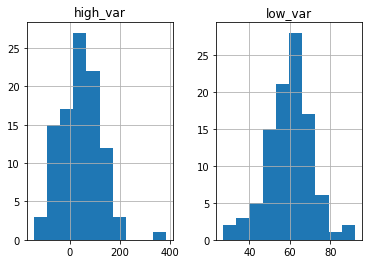

Mean of low_var and high_var:
 low_var     59.939376
high_var    45.067923
dtype: float64


In [87]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample = pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var'] = np.random.choice(pop['high_var'], 100)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
print("Mean of low_var and high_var:\n", sample.mean())

In [88]:
print("Standard deviation of low_var and high_var:\n", sample.std(ddof=1))

Standard deviation of low_var and high_var:
 low_var     11.086472
high_var    83.231161
dtype: float64


## Describing Data with Pandas

In [93]:
# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100

# 100 height values for males, 100 height values for females
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))

# 100 weight values for males, 100 weight values for females
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

In [94]:
data.head(10)

,gender,height,weight
0,male,50.959674,219.002302
1,male,74.446884,181.672138
2,male,68.947589,227.224555
3,male,70.985035,183.912732
4,male,67.450278,176.956691
5,male,61.804831,207.696195
6,male,74.585152,200.074910
7,male,73.340665,196.075889
8,male,70.728645,219.056892
9,male,76.916039,165.639454


In [95]:
data.tail(10)

,gender,height,weight
190,female,65.311441,190.578623
191,female,78.716213,141.028685
192,female,69.535351,174.398181
193,female,71.479530,169.373652
194,female,72.243884,173.748101
195,female,70.668530,166.003735
196,female,61.102835,173.704274
197,female,59.092813,155.762306
198,female,65.271655,171.205835
199,female,68.301139,151.310640


In [98]:
data['height'].mean()

66.50732040160368

In [99]:
data['height'].std()

6.111287967171247

In [104]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,66.507320,182.331072
std,6.111288,25.680363
min,50.959674,126.176808
25%,62.567293,164.328248
50%,65.882413,181.419043
75%,70.683559,196.004490
max,83.695162,261.371875


In [109]:
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  65.552001  4.932031  52.280828  62.736019  65.167558   
male    100.0  67.462639  6.993161  50.959674  62.494401  68.263619   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  68.394977  78.716213  100.0  169.044113  15.819115  129.371779   
male    71.167185  83.695162  100.0  195.618031  26.809066  126.176808   

                                                        
               25%         50%         75%         max  
gender                                                  
female  158.481738  170.627568  181.572140  201.837695  
male    180.393016  195.822696  214.485936  261.371875

In [110]:
data['gender'].value_counts()

male      100
female    100
Name: gender, dtype: int64